Importing modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = pd.read_csv('spam.csv')
df.head()

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [4]:
print(df.describe())

       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30


In [5]:
print(df.shape)

(5572, 2)


In [19]:
print(df.isnull().sum())
df= df.dropna()

# Map category to numeric
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

Category    0
Message     0
dtype: int64


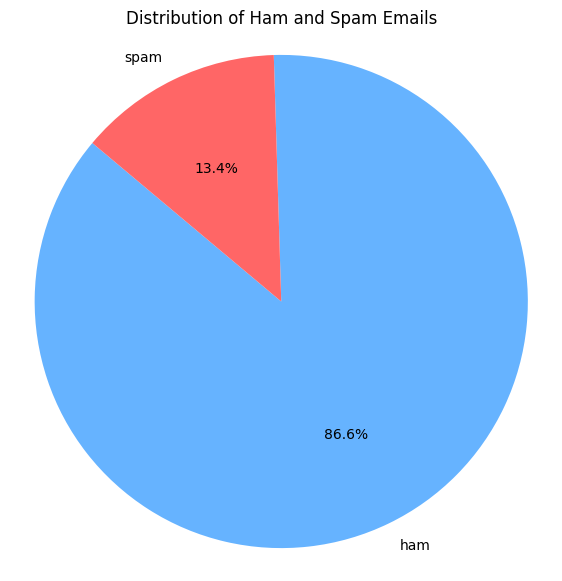

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataset in a CSV file with columns 'category' and 'message'
# Load the dataset into a pandas DataFrame
df = pd.read_csv('spam.csv')

# Count the occurrences of each category (ham and spam)
category_counts = df['Category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff6666'])
plt.title('Distribution of Ham and Spam Emails')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


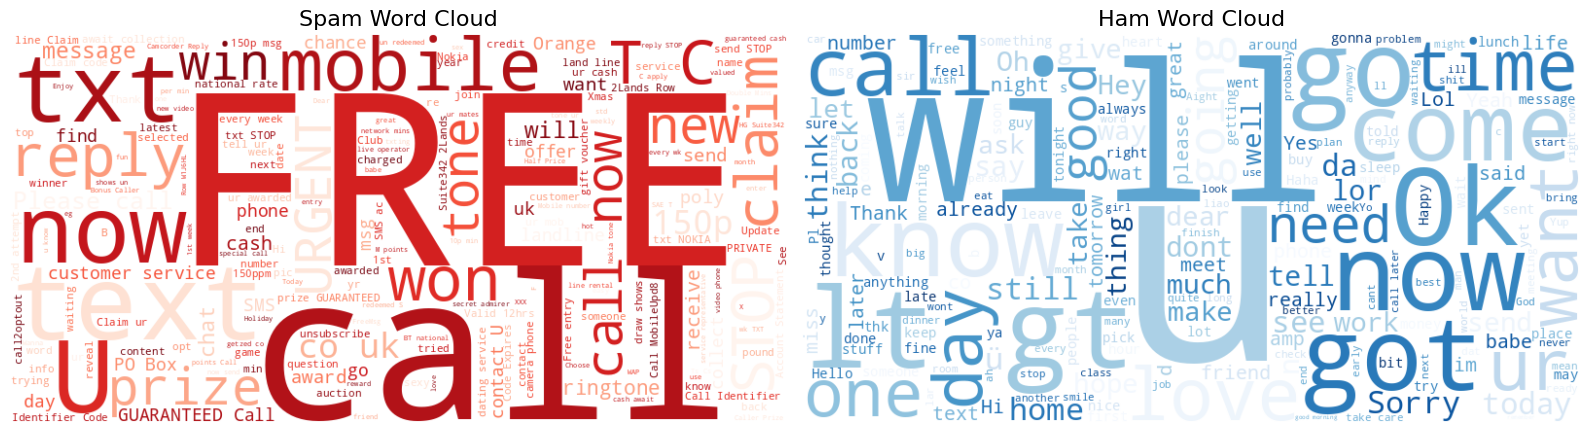

In [22]:
from wordcloud import WordCloud
spam_text = " ".join(df[df['Category'] == 1]['Message'])
ham_text = " ".join(df[df['Category'] == 0]['Message'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_text)
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-24-d0c6753146a2>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_scores = mean_tfidf_scores[sorted_indices[:10]]
<ipython-input-24-d0c6753146a2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='viridis')


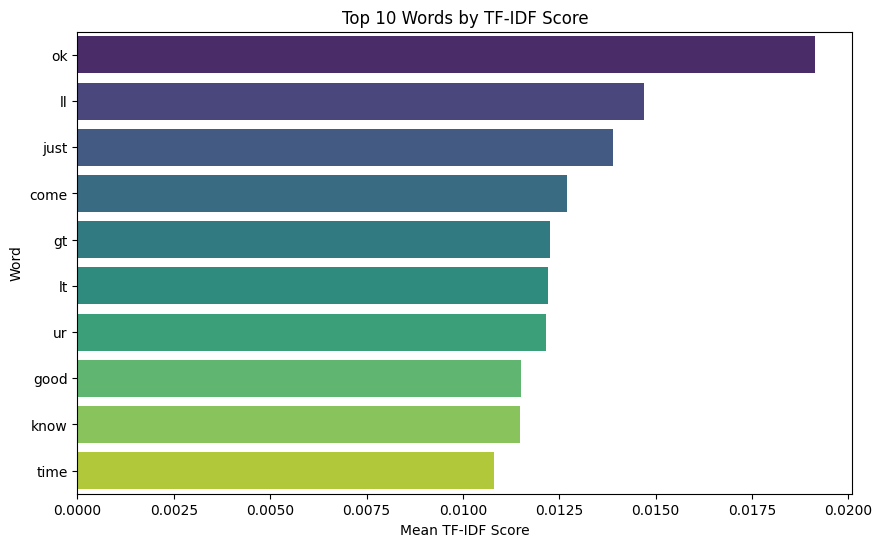

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['Message']
y = df['Category']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X)

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
mean_tfidf_scores = np.mean(tfidf_df, axis=0)
sorted_indices = np.argsort(mean_tfidf_scores)[::-1]
top_words = vectorizer.get_feature_names_out()[sorted_indices[:10]]
top_scores = mean_tfidf_scores[sorted_indices[:10]]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_words, palette='viridis')
plt.title('Top 10 Words by TF-IDF Score')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Word')
plt.show()


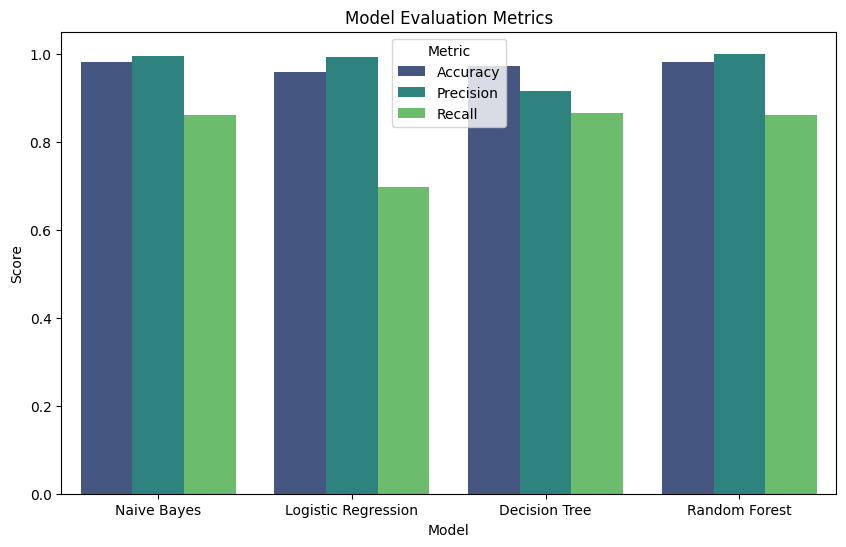

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, confusion_matrix
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Initialize results dictionary
results = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Confusion Matrix": cm
    }

# Visualize metrics
metrics_df = pd.DataFrame({
    model: [results[model]["Accuracy"], results[model]["Precision"], results[model]["Recall"]]
    for model in results
}, index=["Accuracy", "Precision", "Recall"]).T

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.reset_index().melt(id_vars="index"),
            x="index", y="value", hue="variable", palette="viridis")
plt.title("Model Evaluation Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()
print()


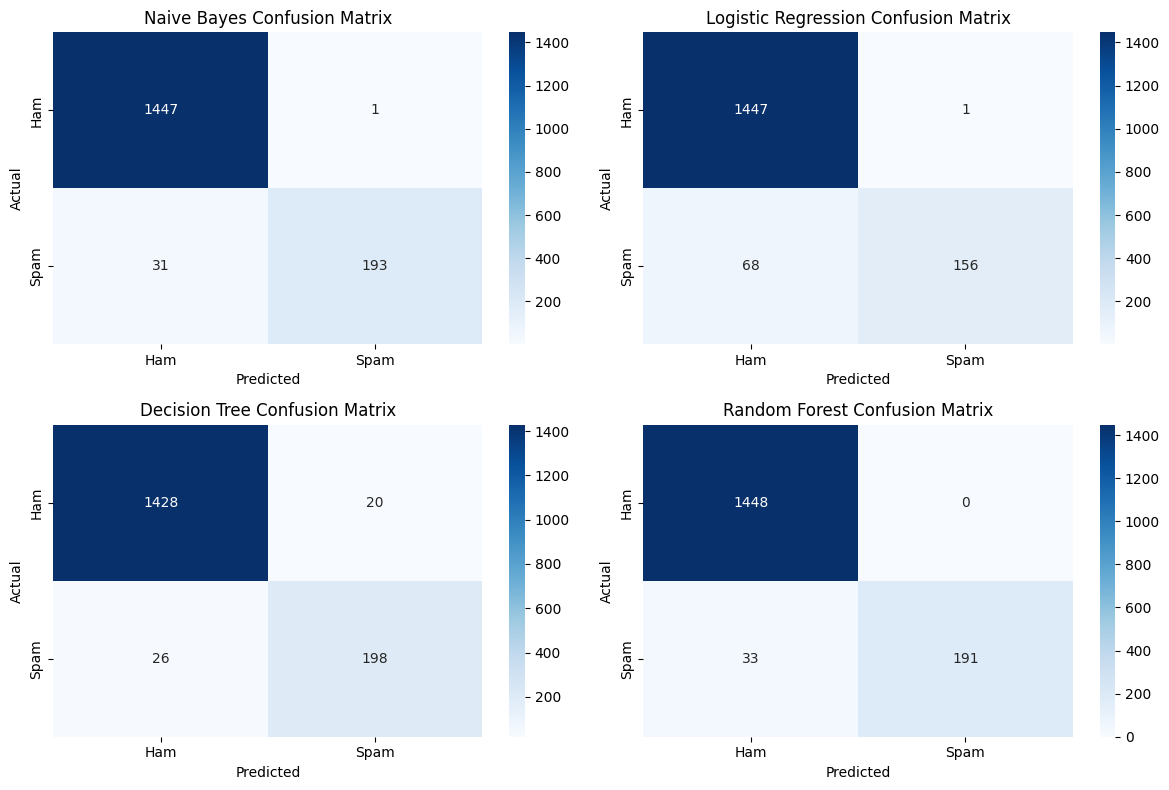

In [28]:
# Confusion Matrix Visualization
plt.figure(figsize=(12, 8))
for i, (model_name, metrics) in enumerate(results.items(), start=1):
    plt.subplot(2, 2, i)
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()